In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import numpy as np
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [66]:
df = pd.read_csv('refined_life_expect.csv')
# print(df.head(20))

# df.loc[df['death_ratio'] == 'inf', ['death_ratio']] = "nan"
df.dropna(inplace=True) #remove all the observations missing data
grouped_df = df.groupby(['country'], as_index=False).agg({'life_expectancy': 'mean', 'alcohol': 'mean',
                                                           'hepatitisB': 'mean', 'bmi': 'mean',
                                                           'measles': 'mean', 'polio': 'mean',
                                                           'polio': 'mean', 'diphtheria': 'mean',
                                                           'hiv': 'mean', 'total_expenditure': 'mean',
                                                           'gdp': 'mean', 'thinness_till19': 'mean',
                                                           'status': 'max'})
                                                    



In [68]:
grouped_df.columns
grouped_df.head(20)

,country,life_expectancy,alcohol,hepatitisB,bmi,measles,polio,diphtheria,hiv,total_expenditure,gdp,thinness_till19,status
0,Afghanistan,58.193750,0.014375,64.562500,15.518750,2362.250000,48.375000,52.312500,0.100000,8.252500,340.015425,16.581250,Developing
1,Albania,75.156250,4.848750,98.000000,49.068750,53.375000,98.125000,98.062500,0.100000,5.945625,2119.726679,1.618750,Developing
2,Algeria,74.209091,0.447273,76.454545,48.872727,647.000000,93.181818,93.363636,0.100000,4.945455,3261.289374,6.000000,Developing
3,Angola,50.675000,7.620000,71.000000,18.450000,3925.625000,70.875000,64.000000,2.450000,3.653750,2935.762962,9.037500,Developing
4,Argentina,75.238462,8.004615,80.307692,54.484615,2.000000,94.461538,93.692308,0.100000,6.546154,6932.546882,1.061538,Developing
5,Armenia,73.306667,3.702667,87.133333,44.026667,290.333333,88.666667,86.933333,0.100000,4.861333,2108.675087,2.033333,Developing
6,Australia,81.907143,10.154286,93.428571,54.928571,105.785714,91.857143,92.000000,0.100000,8.839286,35391.195154,0.671429,Developed
7,Austria,81.480000,12.236000,80.266667,47.666667,61.800000,85.533333,86.333333,0.100000,4.715333,33171.578263,1.720000,Developed
8,Azerbaijan,71.146154,1.055385,56.384615,43.407692,675.923077,74.076923,82.153846,0.100000,5.849231,4004.784071,2.869231,Developing
9,Bangladesh,69.966667,0.010000,76.000000,14.441667,5096.916667,87.666667,94.750000,0.100000,2.952500,573.581681,16.200000,Developing


In [52]:
df.shape

(1649, 17)

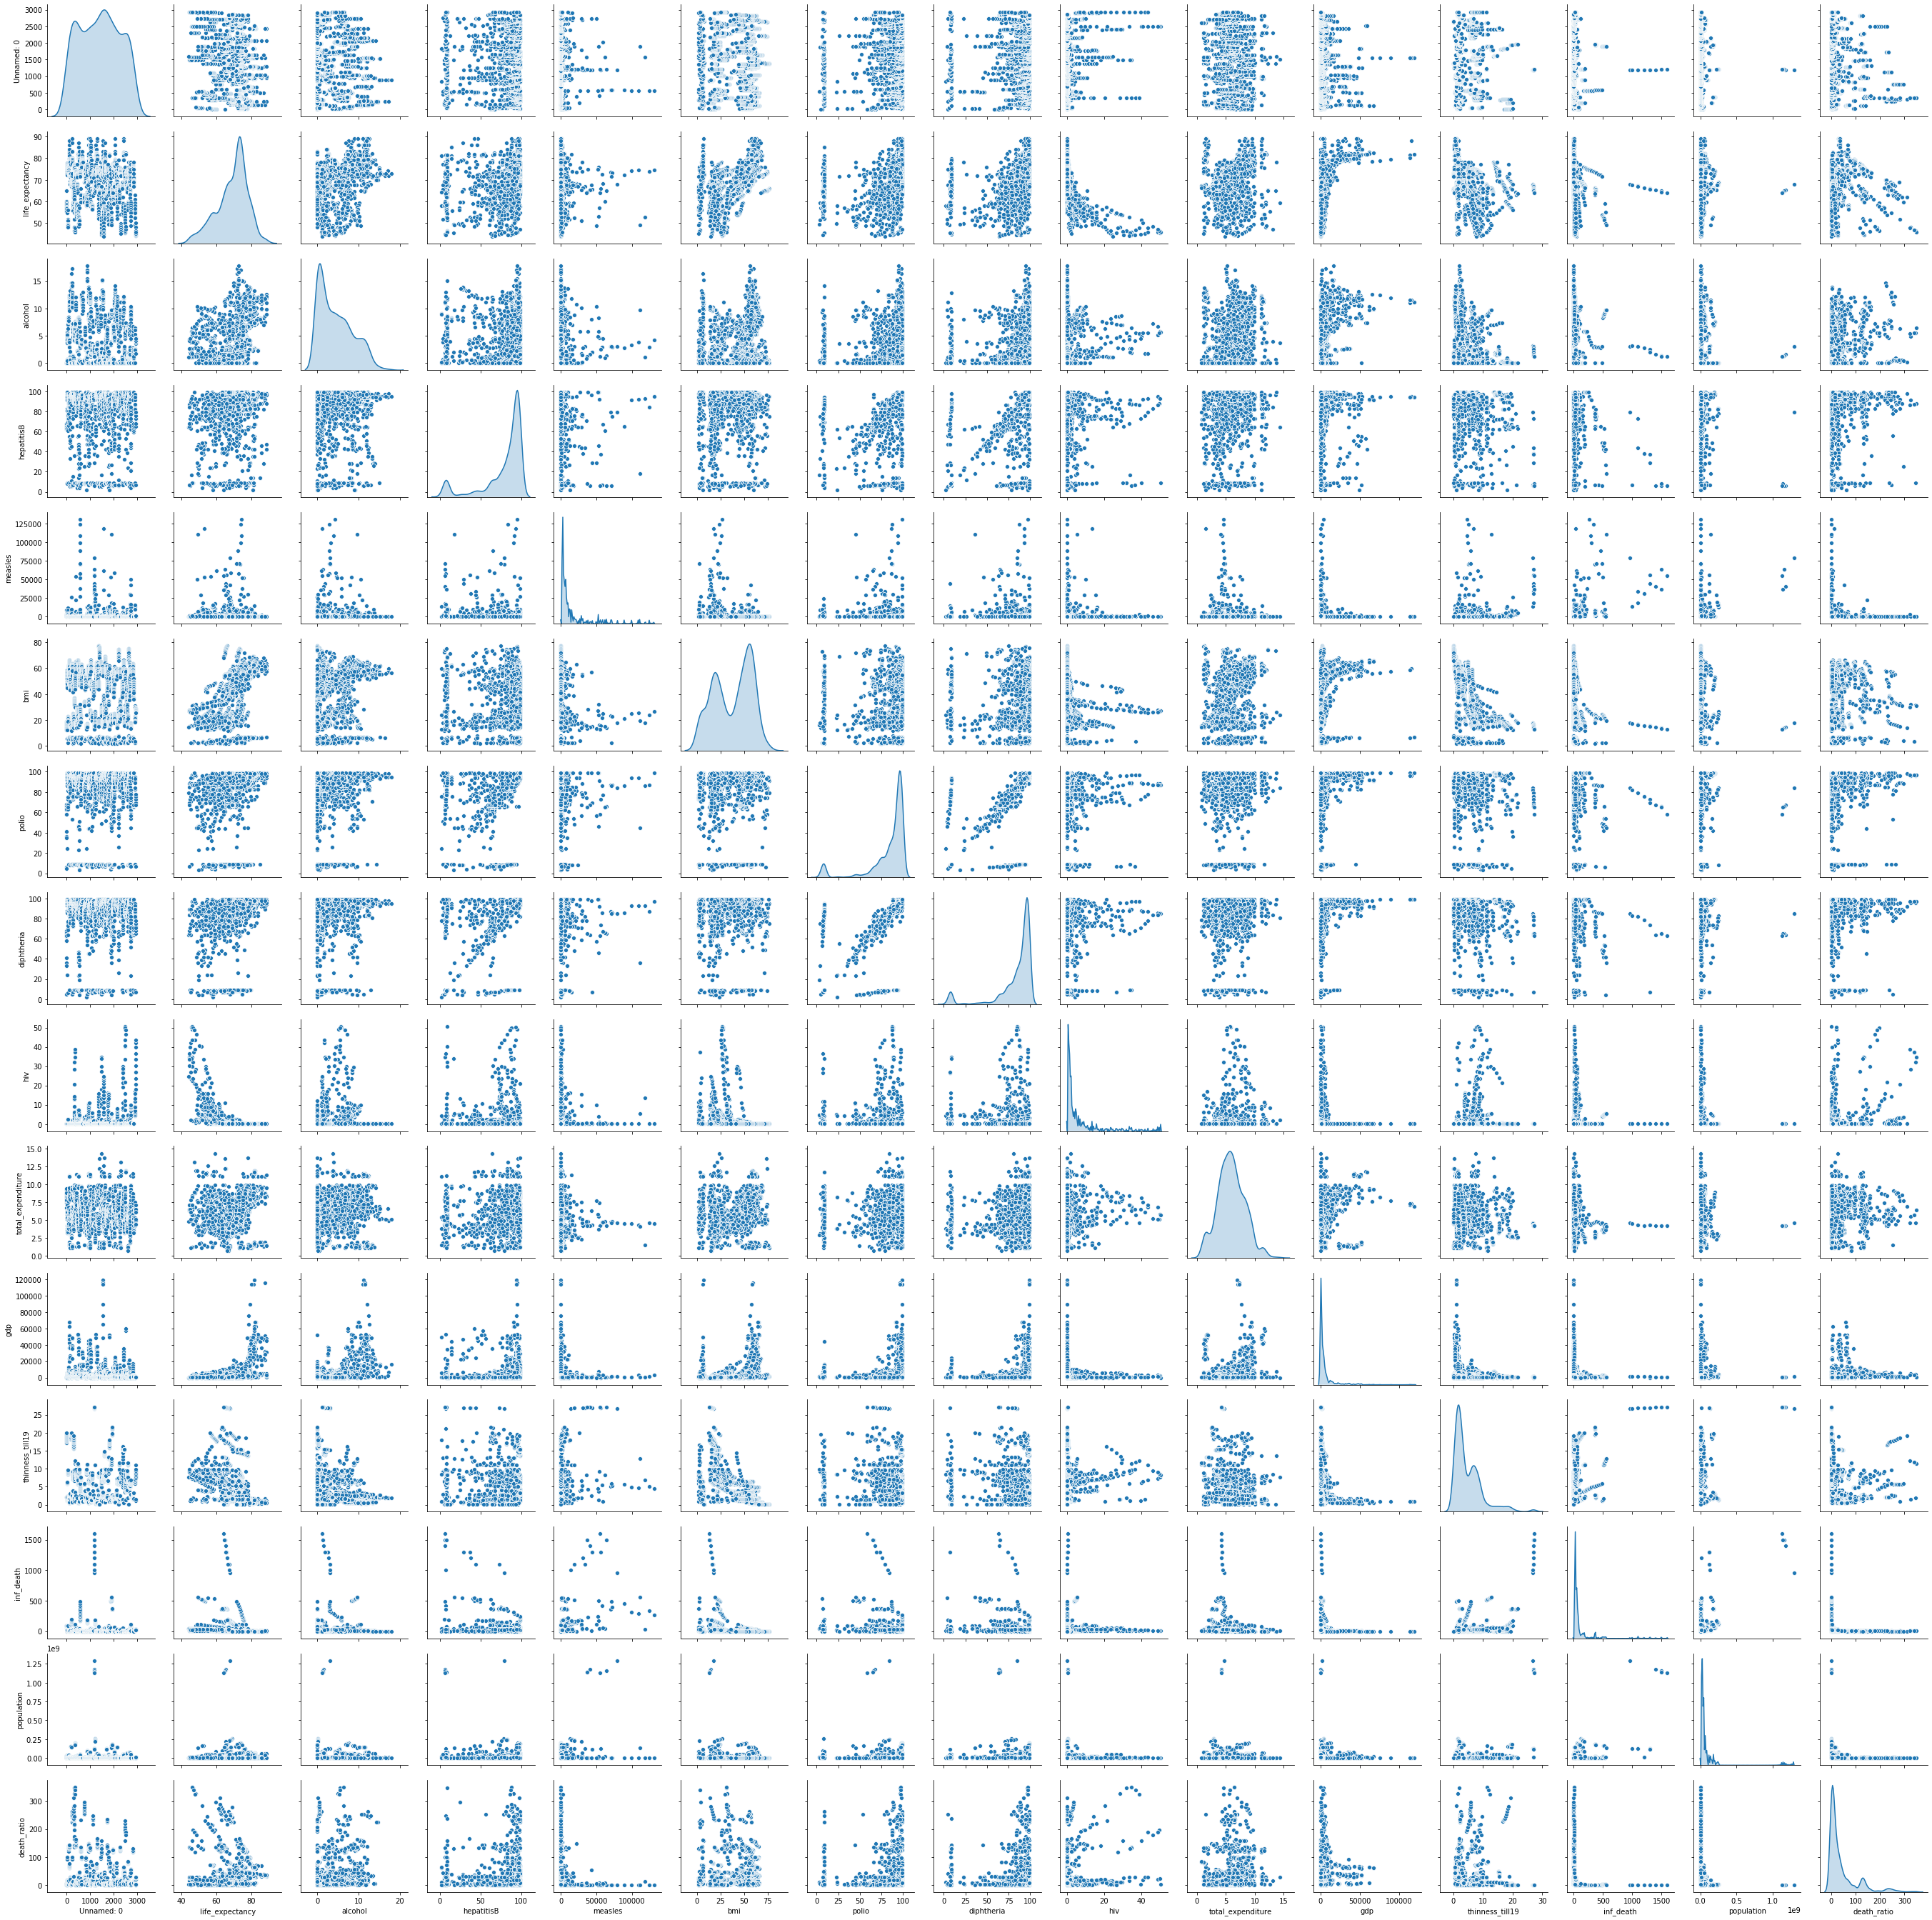

In [53]:
sns.pairplot(df, diag_kind="kde", height=2.5)

In [61]:
lr_model = ols(formula='life_expectancy~alcohol+hepatitisB+bmi+diphtheria+gdp+thinness_till19+polio+population+total_expenditure+hiv+measles', data=grouped_df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     51.18
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           3.16e-40
Time:                        08:58:12   Log-Likelihood:                -363.08
No. Observations:                 133   AIC:                             750.2
Df Residuals:                     121   BIC:                             784.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.9294      2.698     17.393      0.000      41.588      52.271
alcohol              -0.0688      0.130     -0.529      0.598      -0.326       0.189
hepatitisB           -0.0491      0.035     -1.400      0.164      -0.119       0.020
bmi                   0.2719      0.039      7.034      0.000       0.195       0.348
diphtheria            0.1613      0.059      2.721      0.007       0.044       0.279
gdp                   0.0003   5.38e-05      4.849      0.000       0.000       0.000
thinness_till19       0.1691      0.141      1.202      0.232      -0.109       0.448
polio                 0.0224      0.058      0.385      0.701      -0.093       0.138
population        -4.716e-09   8.88e-09     -0.531      0.596   -2.23e-08    1.29e-08
total_expenditure    -0.0759      0.221     -0.344      0.731      -0.512       0.361
hiv                  -0.6615      0.074     -8.947      0.000      -0.808      -0.515
measles            8.075e-05   5.62e-05      1.437      0.153   -3.05e-05       0.000
==============================================================================
Omnibus:                       14.750   Durbin-Watson:                   2.245
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.321
Skew:                          -0.697   Prob(JB):                     0.000173
Kurtosis:                       4.087   Cond. No.                     4.42e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
lr_model = ols(formula='inf_death~+hepatitisB+diphtheria+thinness_till19+polio', data=df).fit()
lr_model.summary()
#removed polio - no effect on the model, removed measles didn't look like it had a significant effect

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inf_death   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     134.1
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           3.08e-99
Time:                        21:05:31   Log-Likelihood:                -10013.
No. Observations:                1649   AIC:                         2.004e+04
Df Residuals:                    1644   BIC:                         2.006e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          35.7657     12.511      2.859      0.004      11.226      60.305
hepatitisB         -0.9053      0.127     -7.141      0.000      -1.154      -0.657
diphtheria          0.2787      0.169      1.651      0.099      -0.052       0.610
thinness_till19    11.6589      0.574     20.309      0.000      10.533      12.785
polio              -0.1377      0.148     -0.933      0.351      -0.427       0.152
==============================================================================
Omnibus:                     1913.737   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202144.118
Skew:                           5.900   Prob(JB):                         0.00
Kurtosis:                      55.942   Cond. No.                         709.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""